# Homework 1 (100 points)

The goal of this homework is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops

look through the pandas documentation for alternatives.

## Exercise 1 (60 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

a) Write a function that reads in a filepath to a csv and returns the DataFrame. (5 points)

In [236]:
import pandas as pd

df = pd.read_csv('train.csv')
df.describe()
df.iloc[0]



PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

b) Write a function that returns the number of rows that have at least one empty column value - (2.5 points)

In [181]:
def num_nans(df):
    result = 0
    grid = pd.isna(df)
    for x in grid.index:
        for y in grid.iloc[x]:
            if y == True:
                result += 1
                break
    return result

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")



there are 708 rows with at least one empty value


c) Write a function that removes all columns with more than 200 NaN values - (2.5 points)

In [182]:
def drop_na(df):
    grid = pd.isna(df)
    for x in df.columns:
        checker = 0
        for y in df[str(x)]:
            if y == True:
                checker += 1
            if checker >= 200:
                df.drop(x, axis=1)
            
df = drop_na(df)


d) Write a function that replaces `male` with 0 and `female` with 1 - (2.5 points)

In [183]:
def to_numerical(df):
    for x in df['Sex']:
        if x == 'male':
            x = '0'
        elif x == 'female':
            x = '1'   
           
df['Sex'] = to_numerical(df)
df.head()



TypeError: 'NoneType' object is not subscriptable

e)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. - (5 points) 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [ ]:
def extract_names(df):
    df['First Name'], df['Middle Name'], df['Last Name'], df['Title'] = [df, 'dogs', 3]

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()

f) Write a function that replaces all missing ages with the average age - (2.5 points)

In [234]:
def replace_with_mean(df):
    df['Age'].fillna(df['Age'].mean())
        

df['Age'] = replace_with_mean(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,None,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,None,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,None,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,None,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,None,0,0,373450,8.0500,NaN,S


The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.

g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (2.5 points)

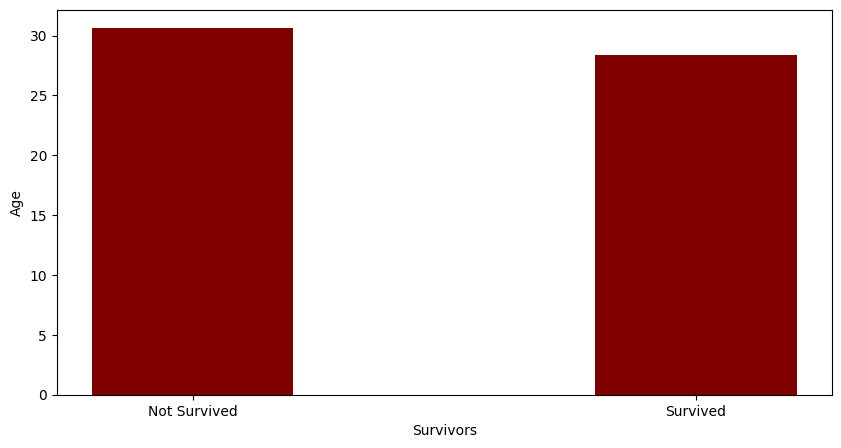

In [214]:
# your code here
import matplotlib.pyplot as plt
import numpy as np

people = df.groupby("Survived")["Age"].mean()
l = ["Not Survived", "Survived"]


fig = plt.figure(figsize = (10, 5))
plt.bar(l, people, color ='maroon',
        width = 0.4)
plt.xlabel("Survivors")
plt.ylabel("Age")
plt.show()

-> It seems like the older you are the more likely you won't survive

h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (2.5 points)

Text(0.5, 1.0, '% of the survivors by gender')

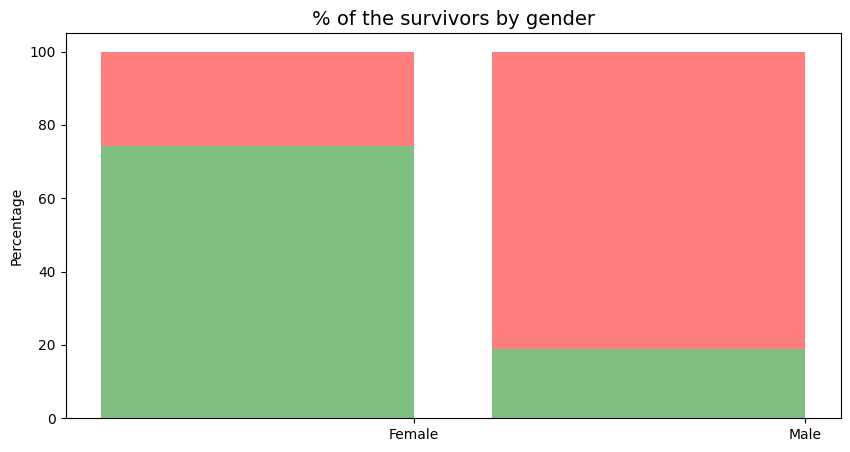

In [252]:
# your code here
# red is deceased and green is alive
survivers = df.groupby('Sex').Survived.mean()
dataForSur = survivers * 100
dataForNsur = (1 - survivers) *100 
gender_categories = ['Female', 'Male']

f, (ax1) = plt.subplots(1, figsize=(10,5))

ax1.bar(range(len(dataForSur)), dataForSur, alpha=0.5, color='g')
ax1.bar(range(len(dataForNsur)), dataForNsur, bottom=dataForSur, alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks([0.4, 1.4],  gender_categories)
ax1.set_ylabel("Percentage")
ax1.set_xlabel("")
ax1.set_title("% of the survivors by gender",fontsize=14)


-> your answer here

i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (5 points)

In [ ]:
# your code here


-> your answer here

j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

Text(0.5, 1.0, '% of the survivors by gender')

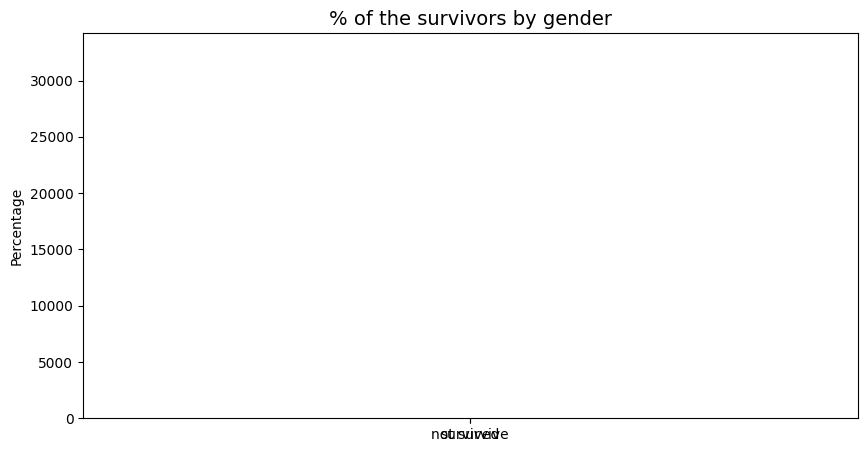

In [256]:
# your code here
survivers = df.groupby('Survived').Survived.sum()
dataForSur = survivers * 100
dataForNsur = (1 - survivers) *100 
gender_categories = ['survived', 'not survive']

f, (ax1) = plt.subplots(1, figsize=(10,5))

ax1.bar(dataForSur, dataForSur, alpha=0.5, color='g')
ax1.bar(dataForNsur, dataForNsur, bottom=dataForSur, alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks([0.4, 1.4],  gender_categories)
ax1.set_ylabel("Percentage")
ax1.set_xlabel("")
ax1.set_title("% of the survivors by gender",fontsize=14)


-> your answer here

k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

In [ ]:
# your code here


-> your answer here

k) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2.5 points)

In [ ]:
# your code here
df.head()

l) Remove all non-numerical columns from the dataframe. - (2.5 points)

In [ ]:
df = # < your code here >

m) Ignoring passenger ID, write a function that returns the names of the N most similar pairs of passengers using the euclidean distance? - (15 points)

In [ ]:
def N_most_similar_pairs(df, N):
    return # < your code here >

print("The 3 most similar passengers are: " + str(N_most_similar_pairs(df, 3)))

## Exercise 2 - (40 points)

Another way to get data is by using APIs. Here we will be using the google books API (https://developers.google.com/books/docs/overview)

a) Create a list with these topic strings: Python; Data Science; Data Analysis; Machine Learning; and Deep 
Learning. Use these topics, one at a time, to query the Google Books API by modifying the code below. - (5 points)

In [258]:
import requests
import json

"""
    Google Books Api
    See: https://developers.google.com/books/
"""

def get(topic=""):
    BASEURL = 'https://www.googleapis.com/books/v1/volumes'
    headers = {'Content-Type': 'application/json'}

    response = requests.get(BASEURL + "?q=" + topic, headers=headers)

    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))

    return response

python = get(python)
data_science = get('Data Science')
data_analytics = get('Data Analysis')
machine_learning = get('Machine Learning')
deep_learning = get('Deep Learning')

ModuleNotFoundError: No module named 'requests'

b) For each returned JSON string: Convert the JSON string to a dict using `loads( )` then use this to convert it to a DataFrame: `pd.json_normalize( thedict['items'] )`. Then save them as `.csv`. - (5 points)

In [ ]:
# your code here


c) For each DataFrame, relabel `volumeInfo.title` as `Title` and `volumeInfo.authors` as `Authors`. - (5 points)

In [ ]:
# your code here

d) For each DataFrame create a new column called `Topic` with the name of the topic from the API query above. Then merge all DataFrames into one and save it to a new `.csv` file. - (10 points)

In [ ]:
# your code here

e) Write a function that returns all rows whose `Title` contains the word `Data` (case incensitive). - (5 points)

In [ ]:
# your code here

f) Write a function that returns all rows whose `Authors` first or last name starts with the letter `E` - (10 points)

In [ ]:
# your code here